<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/Kr00k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kr00k_0
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
#to check whih files have both attack and normal labels
for j in range(0,59):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='Kr00k'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36
n is 1 and j is 37
n is 1 and j is 38
n is 1 and j is 39
n is 1 and j is 40
n is 1 and j is 41
n is 1 and j is 42
n is 1 and j is 43
n is 1 and j is 44
n is 1 and j is 45
n is 1 and j is 46
n is 1 and j is 47
n is 1 and j is 48
n is 1 and j is 49
n is 1 and j is 50
n is 1 and j is 51
n is 1 and j is 52
n is 1 and j is 53
n is 1 and j is 54
n is 1 and j is 55
n is 1 and j is 56
n is 1 and j is 57
n is 1 and j is 58


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_36.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_37.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_38.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_39.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_40.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_41.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_42.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_43.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_44.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_45.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_46.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_47.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_48.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_49.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_50.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_51.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_52.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_53.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_54.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_55.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_56.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_57.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/6.Kr00k/Kr00k_58.csv"]), ignore_index=True)

In [ ]:
drop_cols = []
for i in df.columns:
    if len(df[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df.drop(drop_cols, 1, inplace=True)

print(df.columns)

Total columns with only 1 unique value: 57
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=197)


In [ ]:
df.dropna(1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350450 entries, 0 to 1350449
Data columns (total 26 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   frame.len                   1350450 non-null  int64  
 1   frame.number                1350450 non-null  int64  
 2   frame.time                  1350450 non-null  object 
 3   frame.time_delta            1350450 non-null  float64
 4   frame.time_delta_displayed  1350450 non-null  float64
 5   frame.time_epoch            1350450 non-null  int64  
 6   frame.time_relative         1350450 non-null  float64
 7   radiotap.dbm_antsignal      1350450 non-null  int64  
 8   radiotap.length             1350450 non-null  int64  
 9   radiotap.present.tsft       1350450 non-null  object 
 10  radiotap.timestamp.ts       1350450 non-null  int64  
 11  wlan.fc.ds                  1350450 non-null  object 
 12  wlan.fc.frag                1350450 non-null  int64  
 1

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal    347515
Kr00k      55957
Kr00K       1663
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float32','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float32','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float32','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

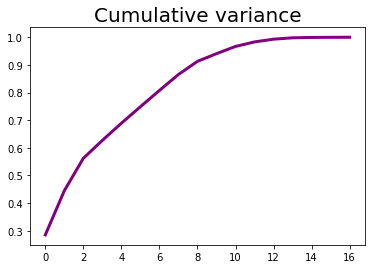

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
frame.len,0.891872,0.011977,0.050075,0.024749,-0.082585,0.007331,-0.004690,0.004385,0.154831,0.094152,0.222229,-0.019609,-0.332495,-0.034812,0.003694,-0.000497,-0.000252
frame.number,0.004679,0.970817,0.055044,0.012137,-0.008823,0.002324,0.000435,0.003401,-0.005987,0.025558,-0.041131,0.222742,-0.014550,0.004773,0.001790,-0.010554,0.043342
frame.time_epoch,0.009257,0.980973,0.053528,0.002631,-0.006298,-0.000077,0.000026,0.004262,-0.008033,0.017663,-0.038321,0.174449,-0.008488,-0.007752,-0.001999,0.011494,-0.046164
radiotap.dbm_antsignal,0.363080,0.044516,-0.908773,0.107943,-0.069059,0.047349,0.007392,-0.005966,0.040494,0.088657,-0.087648,-0.006423,0.019077,-0.017991,0.000026,0.059908,0.008364
radiotap.length,0.948229,-0.021573,0.129825,-0.155119,-0.059010,0.004207,-0.003335,0.021779,-0.044966,0.034498,-0.089426,-0.003415,0.019714,0.191413,-0.085108,0.002204,-0.000292


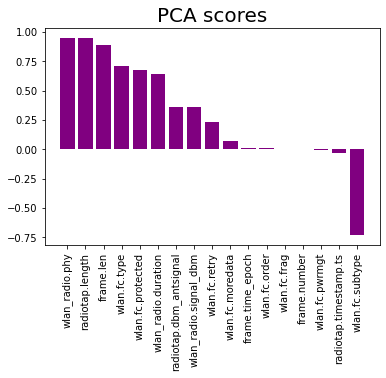

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']

plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()